In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint 

In [2]:
# Loading data
diabetes_df = pd.read_csv("Resources/cleaned_diabetes_df.csv")
diabetes_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureRange,GlucoseRange,BMIRange
0,148,72,35,125,33.6,0.627,50,1,Elevated,Prediabetic,Obesity Class I
1,85,66,29,125,26.6,0.351,31,0,Normal,Normal,Overweight
2,183,64,29,125,23.3,0.672,32,1,Normal,Prediabetic,Normal Weight
3,89,66,23,94,28.1,0.167,21,0,Normal,Normal,Overweight
4,137,40,35,168,43.1,2.288,33,1,Low,Normal,Obesity Class III


In [10]:
# Filter rows with Outcome equal to 1 (people who have diabetes)
diabetes_positive_df = diabetes_df[diabetes_df['Outcome'] == 1]
diabetes_negative_df = diabetes_df[diabetes_df['Outcome'] == 0]

diabetes_positive_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressureRange,GlucoseRange,BMIRange
0,148,72,35,125,33.6,0.627,50,1,Elevated,Prediabetic,Obesity Class I
2,183,64,29,125,23.3,0.672,32,1,Normal,Prediabetic,Normal Weight
4,137,40,35,168,43.1,2.288,33,1,Low,Normal,Obesity Class III
6,78,50,32,88,31.0,0.248,26,1,Low,Normal,Obesity Class I
8,197,70,45,543,30.5,0.158,53,1,Elevated,Prediabetic,Obesity Class I


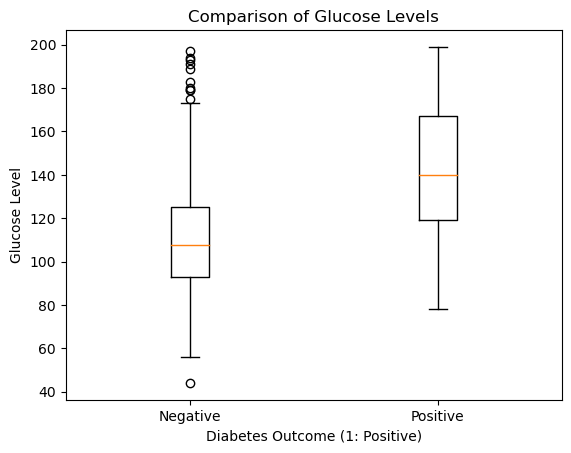

In [12]:
plt.boxplot([diabetes_negative_df['Glucose'], diabetes_positive_df['Glucose']], labels=['Negative', 'Positive'])
plt.xlabel('Diabetes Outcome (1: Positive)')
plt.ylabel('Glucose Level')
plt.title('Comparison of Glucose Levels')
plt.show()

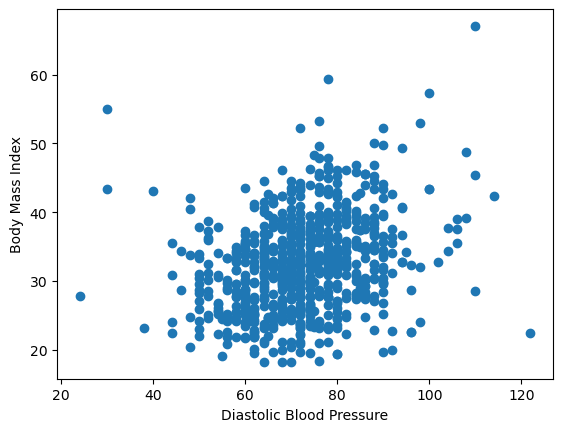

In [4]:
#Create a scatter plot of BMI and Blood Pressure 
Blood_Pressure = diabetes_df.iloc[:,1]
BMI = diabetes_df.iloc[:,4]
plt.scatter(Blood_Pressure, BMI)
plt.xlabel("Diastolic Blood Pressure")
plt.ylabel("Body Mass Index")
plt.savefig("Images/BP_vs_BMI.png")
plt.show()

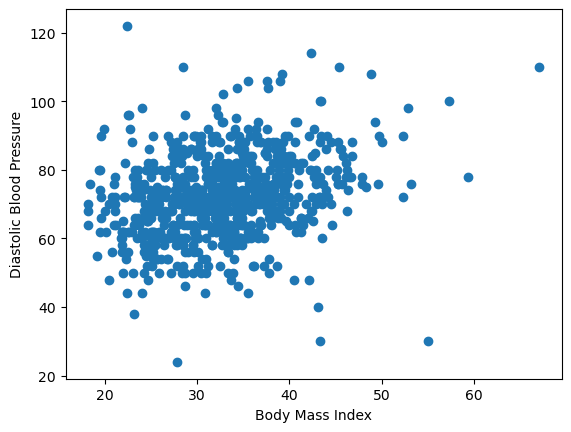

In [6]:
#Create a scatter plot of BMI and Blood Pressure 
plt.scatter(BMI, Blood_Pressure)
plt.xlabel("Body Mass Index")
plt.ylabel("Diastolic Blood Pressure")
plt.savefig("Images/BMI vs BP.png")
plt.show()

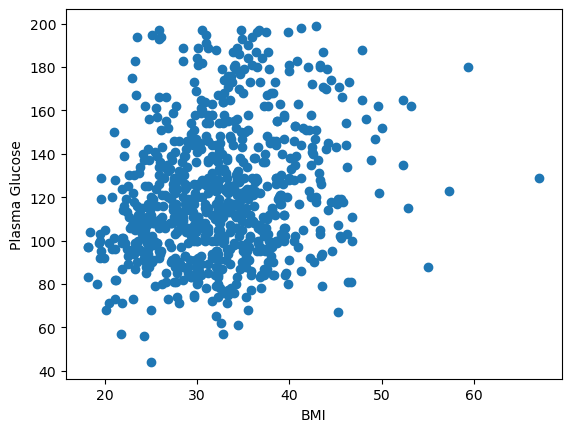

In [7]:
#Create a scatter plot of BMI and glucose 
Glucose = diabetes_df.iloc[:,0]
plt.scatter(BMI, Glucose)
plt.xlabel("BMI")
plt.ylabel("Plasma Glucose")
plt.savefig("Images/BMI_vs_Glucose.png")
plt.show()

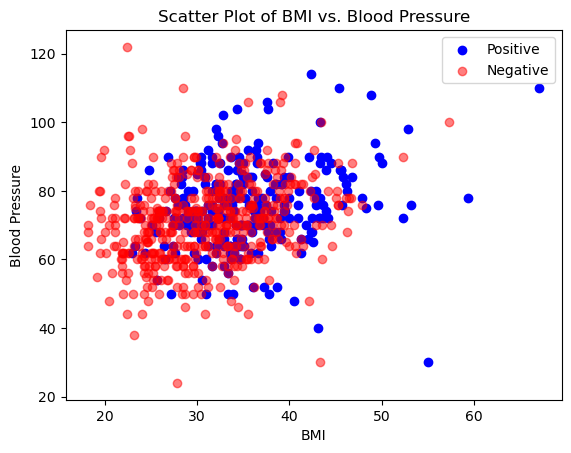

In [14]:
plt.scatter(diabetes_positive_df['BMI'], diabetes_positive_df['BloodPressure'], c='blue', label='Positive')
plt.scatter(diabetes_negative_df['BMI'], diabetes_negative_df['BloodPressure'], c='red', label='Negative', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.legend()
plt.title('Scatter Plot of BMI vs. Blood Pressure')
plt.show()

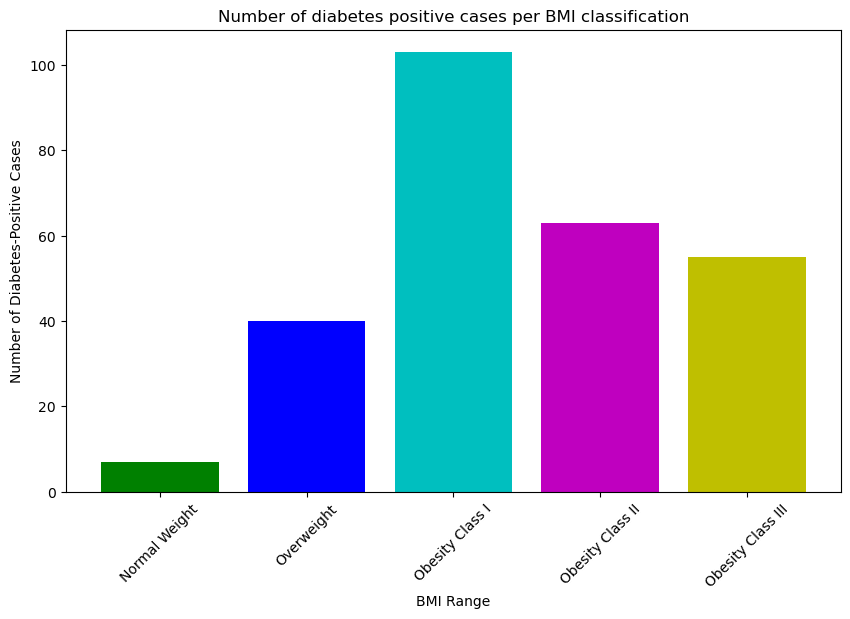

In [23]:
# Define a custom order for BMI ranges
custom_order = ["Normal Weight", "Overweight", "Obesity Class I", "Obesity Class II", "Obesity Class III"]

# Count the number of diabetes-positive cases in each BMI range and sort it using the custom order
bmi_range_counts = diabetes_positive_df['BMIRange'].value_counts().loc[custom_order]

# Define a list of colors (one for each bar)
colors = ['g', 'b', 'c', 'm', 'y']

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(bmi_range_counts.index, bmi_range_counts.values, color=colors)
plt.xlabel('BMI Range')
plt.ylabel('Number of Diabetes-Positive Cases')
plt.title('Number of diabetes positive cases per BMI classification')
plt.xticks(rotation=45) 

plt.show()